In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
#Load in the data
df=pd.read_csv("/content/googleplaystore.csv")

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Find rows and columns
df.shape

(10841, 13)

In [ ]:
#Removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_paid=df[df.Type!='Free']
df_free=df[df.Type=='Free']
df_paid['Installs']=df_paid['Installs'].str.replace('+','').str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#After removing duplicates checking rows and columns
df.shape

(10358, 13)

In [ ]:
df_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,1000,Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000,Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,10000,Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [ ]:
df_paid.shape

(767, 13)

In [ ]:
df_paid_familyct=df_paid[df_paid.Category=='GAME']

In [ ]:
#Deleting columns
df_paid_familyct.dropna(subset=['Rating'],inplace=True)
df_paid_familyct.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

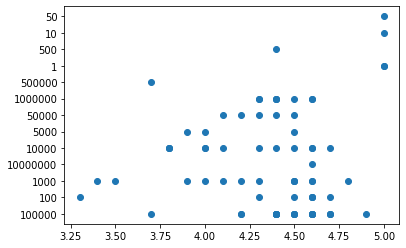

In [ ]:
#Plotting a graph
plt.scatter(df_paid_familyct['Rating'],df_paid_familyct['Installs'])

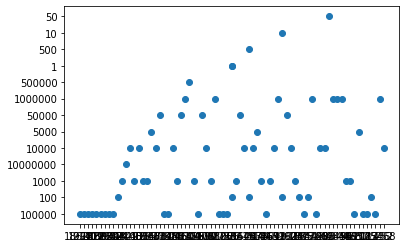

In [ ]:
plt.scatter(df_paid_familyct['Reviews'],df_paid_familyct['Installs'])

In [ ]:
X=df_paid_familyct[['Rating']]
Y=df_paid_familyct['Installs']

In [ ]:
X.isnull().sum()

Rating    0
dtype: int64

In [ ]:
#Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
#Train values
X_train.head()

,Rating
9024,4.7
5917,5.0
6341,4.6
6538,4.6
4203,4.6


In [ ]:
#lenght
X_train.dropna()
len(y_train)

61

In [ ]:
#size
len(X_test)

16

In [ ]:
#training data:
from sklearn.linear_model import LogisticRegression
slm = LogisticRegression()
slm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
result=slm.predict(X_test)
result

array(['100000', '1000', '100000', '100000', '100000', '100000', '100000',
       '100000', '100000', '100000', '100000', '100000', '100000',
       '100000', '100000', '100000'], dtype=object)

In [ ]:
y_test

9592        5000
4417        5000
6440       10000
9325        1000
9165     1000000
1832      100000
1834      100000
10679     100000
4419       10000
10682    1000000
8879      100000
4542       50000
1835      100000
9480        1000
5367       10000
8804     1000000
Name: Installs, dtype: object

In [ ]:
#EVALUATION
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,result))
print('MSE',metrics.mean_squared_error(y_test,result))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,result)))

MAE 207312.5
MSE 155340187500.0
RMSE 394132.1954623854
